In [ ]:
Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
#here target is output
#to check patient has heart related problem or not
#this is classification type dataset because output is 1 and 0

In [1]:
import os 
os.getcwd()

'/Users/pratikghanekar/Desktop/ML/case study'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to load csv file use pandas features read_csv
df=pd.read_csv("heart.csv")
df.head()
#here target is output
#to check patient has heart related problem or not
#this is classification type dataset because output is 1 and 0

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#check how many rows and col
df.shape

(303, 14)

In [5]:
#check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

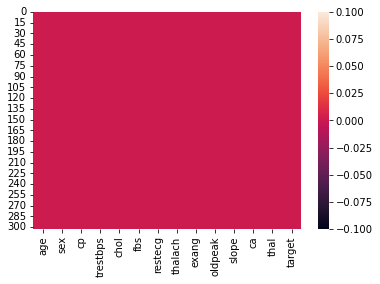

In [6]:
#check null values in viualise form
sb.heatmap(df.isnull())
plt.show()

In [7]:
#check data type
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
#check duplicates values
df.duplicated().sum()
#here is 1 duplicated values

1

In [9]:
#check duplicated value
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
#remove duplicated value from table
df.drop_duplicates(inplace=True)

In [11]:
#again check duplicated values
df.duplicated().sum()

0

In [12]:
#check how many row and col
df.shape

(302, 14)

1    164
0    138
Name: target, dtype: int64


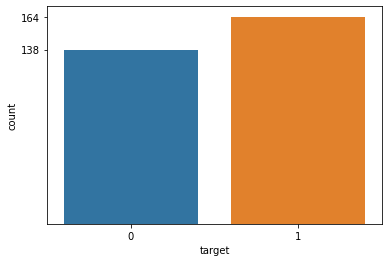

In [92]:
#check data bal or not
f=df['target'].value_counts()
print(f)
sb.countplot(data=df,x='target')
plt.yticks(f)
plt.show()
#here data is bal

In [13]:
#select input and output
X=df.drop("target",axis=1)#select input
Y=df['target'] # select output

In [14]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [16]:
#apply train_test_split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,
                                              random_state=1)

In [17]:
#apply scalling on input 
#apply standard scaler
from sklearn.preprocessing import StandardScaler

#create object of StandardScaler class
ss=StandardScaler()
#using fit method to train data
X_train=ss.fit_transform(X_train,Y_train)#covert to numpy array
X_test=ss.transform(X_test) #convert to numpy array

In [18]:
X_train

array([[-1.06167727, -1.55023411,  1.02938967, ..., -0.69616283,
         0.27995117, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
        -0.72123014,  1.12056846],
       [ 0.43317242, -1.55023411, -0.92737808, ..., -0.69616283,
         1.28113248, -2.14067216],
       ...,
       [-2.66330193,  0.64506386,  0.05100579, ...,  0.95429062,
        -0.72123014, -0.51005185],
       [ 0.43317242,  0.64506386, -0.92737808, ...,  0.95429062,
         1.28113248,  1.12056846],
       [ 0.00607251,  0.64506386,  1.02938967, ...,  0.95429062,
        -0.72123014,  1.12056846]])

In [19]:
#create fn
def create_model(model):
    
    #train data with 70%
    model.fit(X_train,Y_train)
    
    #test data with 30%
    Y_pred=model.predict(X_test)
    
    #to genrate report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    
    return model

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
#give dataset to logistic regression
from sklearn.linear_model import LogisticRegression

In [22]:
#create object of LogisticRegression class
lr=LogisticRegression()

In [23]:
#call fn
lr=create_model(lr)
#here recall is 83% 
#which is good but it could be better

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.83      0.84        53

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[30  8]
 [ 9 44]]


In [24]:
#give dataset to DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier #bydefault gini

In [25]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1)

In [26]:
#call fn
dt=create_model(dt)
#here recall is 70%

              precision    recall  f1-score   support

           0       0.65      0.79      0.71        38
           1       0.82      0.70      0.76        53

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.73        91
weighted avg       0.75      0.74      0.74        91

[[30  8]
 [16 37]]


In [27]:
#check IG
dict={"input":X.columns,"IG":dt.feature_importances_}
#convert into Dataframe
df1=pd.DataFrame(dict)
#sorting
df1.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,cp,0.317338
1,chol,0.113529
2,ca,0.113295
3,thal,0.088533
4,age,0.085167
5,exang,0.081387
6,thalach,0.073287
7,oldpeak,0.061444
8,trestbps,0.045681
9,sex,0.020339


In [28]:
#create object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier(random_state=1,max_depth=5)
#Call fn
dt1=create_model(dt1)
#here recall is 75%

              precision    recall  f1-score   support

           0       0.69      0.76      0.72        38
           1       0.82      0.75      0.78        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[29  9]
 [13 40]]


In [29]:
#create object of DecisionTreeClassifier class
dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)
#call fn
dt2=create_model(dt2)
#here recall is 72%

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


In [30]:
#check IG
dict={"input":X.columns,"IG":dt2.feature_importances_}
#convert to DataFrame
df2=pd.DataFrame(dict)
#sorting
df2.sort_values("IG",ascending=False,ignore_index=True)
#here CP,CA,AGE has more IG

,input,IG
0,cp,0.704874
1,ca,0.218659
2,age,0.076467
3,sex,0.000000
4,trestbps,0.000000
5,chol,0.000000
6,fbs,0.000000
7,restecg,0.000000
8,thalach,0.000000
9,exang,0.000000


In [32]:
#give data to decisionTree entropy method
from sklearn.tree import DecisionTreeClassifier

In [33]:
#create object of DecisionTreeClassifier class
dt_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy')

In [34]:
#call fn
dt_entropy=create_model(dt_entropy)
#here recall is 70%

              precision    recall  f1-score   support

           0       0.64      0.74      0.68        38
           1       0.79      0.70      0.74        53

    accuracy                           0.71        91
   macro avg       0.71      0.72      0.71        91
weighted avg       0.72      0.71      0.72        91

[[28 10]
 [16 37]]


In [35]:
#check IG of input col
dict={"input":X.columns,"IG":dt_entropy.feature_importances_}
#convert to dataframe
df3=pd.DataFrame(dict)
#sorting
df3.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,cp,0.243182
1,ca,0.129411
2,age,0.108986
3,thal,0.097910
4,trestbps,0.096058
5,thalach,0.089420
6,chol,0.083485
7,exang,0.077822
8,oldpeak,0.045352
9,sex,0.028375


In [36]:
#create object of DecisionTreeClassifier class
dt_entropy1=DecisionTreeClassifier(random_state=1,max_depth=6,criterion='entropy')
#call fn
dt_entropy1=create_model(dt_entropy1)
#here recall is 75%

              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.80      0.75      0.78        53

    accuracy                           0.75        91
   macro avg       0.74      0.75      0.74        91
weighted avg       0.75      0.75      0.75        91

[[28 10]
 [13 40]]


In [44]:
#check IG
dict={"input":X.columns,"IG":dt_entropy1.feature_importances_}
#convert to DataFrame
df3=pd.DataFrame(dict)
#sorting
df3.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,cp,0.261707
1,ca,0.139269
2,age,0.112116
3,trestbps,0.101919
4,thalach,0.096232
5,thal,0.084927
6,exang,0.069672
7,chol,0.065036
8,oldpeak,0.038586
9,sex,0.030536


In [43]:
#crate object of DecisionTreeClassifier
dt2_entropy=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=45)
#call fn
dt2_entropy=create_model(dt2_entropy)
#here recall is 72%

              precision    recall  f1-score   support

           0       0.63      0.68      0.66        38
           1       0.76      0.72      0.74        53

    accuracy                           0.70        91
   macro avg       0.70      0.70      0.70        91
weighted avg       0.71      0.70      0.70        91

[[26 12]
 [15 38]]


In [45]:
#check IG
dict={"input":X.columns,"IG":dt2_entropy.feature_importances_}
#convert to DataFrame
df3=pd.DataFrame(dict)
#sorting
df3.sort_values("IG",ascending=False,ignore_index=True)

,input,IG
0,cp,0.623586
1,ca,0.277669
2,age,0.098745
3,sex,0.000000
4,trestbps,0.000000
5,chol,0.000000
6,fbs,0.000000
7,restecg,0.000000
8,thalach,0.000000
9,exang,0.000000


In [48]:
#give dataset to RandomForestTree ensemble tech
from sklearn.ensemble import RandomForestClassifier

In [52]:
#create object of RandomForestClassifier class
rfc=RandomForestClassifier(random_state=1,n_estimators=25)
#call fn
rfc=create_model(rfc)
#here recall is 77%

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.80      0.77      0.79        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[28 10]
 [12 41]]


In [53]:
#check information gain :
dict={"input":X.columns,"IG":rfc.feature_importances_}
#convert dict to dataframe
df1=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.190503
1,thalach,0.155793
2,thal,0.104839
3,oldpeak,0.092591
4,ca,0.076090
5,age,0.071090
6,trestbps,0.067548
7,slope,0.062051
8,chol,0.058885
9,exang,0.052457


In [55]:
rfc1=RandomForestClassifier(n_estimators=25,random_state=1,max_depth=2) #bydefault gini
#call function 
rfc1=create_model(rfc1)
#here recall is 81%

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.83      0.81      0.82        53

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[29  9]
 [10 43]]


In [57]:
rfc2=RandomForestClassifier(n_estimators=25,random_state=1,min_samples_leaf=45) 

#call fn
rfc2=create_model(rfc2)
#here recall is 79%

              precision    recall  f1-score   support

           0       0.72      0.76      0.74        38
           1       0.82      0.79      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91

[[29  9]
 [11 42]]


In [58]:
#check information gain :
dict={"input":X.columns,"IG":rfc2.feature_importances_}
#convert dict to dataframe
df2=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,thal,0.278374
1,cp,0.240000
2,thalach,0.160000
3,slope,0.160000
4,age,0.040000
5,chol,0.040000
6,oldpeak,0.040000
7,ca,0.040000
8,restecg,0.001626
9,sex,0.000000


In [59]:
#apply boosting technique
#first apply ADA boost
from sklearn.ensemble import AdaBoostClassifier

In [60]:
X.shape

(302, 13)

In [62]:
#create object of AdaBoostClassifier
ada=AdaBoostClassifier(random_state=1,n_estimators=6)
#call fn
ada=create_model(ada)
#here recall is 81%
#hence outoff 13 features 6 features are imp

              precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.80      0.81      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[27 11]
 [10 43]]


In [63]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":ada.feature_importances_}
#convert dict to dataframe
df1=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df1.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,sex,0.166667
1,cp,0.166667
2,thalach,0.166667
3,oldpeak,0.166667
4,slope,0.166667
5,ca,0.166667
6,age,0.000000
7,trestbps,0.000000
8,chol,0.000000
9,fbs,0.000000


In [64]:
#apply second boosting tech gradient boost
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=11)
#call fn
gbc=create_model(gbc)
#here recall is 81% 
#and n_estimator=11
#after 11 iteration shows imp feature

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        38
           1       0.81      0.81      0.81        53

    accuracy                           0.78        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.78      0.78      0.78        91

[[28 10]
 [10 43]]


In [67]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":gbc.feature_importances_}
#convert dict to dataframe
df2=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df2.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.428971
1,ca,0.151844
2,thalach,0.085778
3,exang,0.077987
4,thal,0.065412
5,oldpeak,0.064054
6,sex,0.042441
7,age,0.030353
8,trestbps,0.020001
9,slope,0.019248


In [68]:
#apply extreme gradient boost tech
!pip install xgboost

In [69]:
from xgboost import XGBClassifier
#create object of XGBClassifier
#n_estimator >=10 and <=100
#reg_alpha=1 here 1 means doing task to t=remove outlier and overfitting
#reg means regularisation and alpha means Lambda means hyperparameter
#if reg_alpha=1 , 1 means True means automatic handle outlier and overfitting

In [71]:
#create object of GradientBoostingClassifier class
xgc=XGBClassifier(random_state=1,n_estimators=18,reg_alpha=1)
#call fn
xgc=create_model(xgc)
#here recall is 77%

[18:49:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        38
           1       0.80      0.77      0.79        53

    accuracy                           0.76        91
   macro avg       0.75      0.76      0.75        91
weighted avg       0.76      0.76      0.76        91

[[28 10]
 [12 41]]


In [72]:
#check imp features
#check information gain :
dict={"input":X.columns,"IG":xgc.feature_importances_}
#convert dict to dataframe
df3=pd.DataFrame(dict)
#sorting in desending order
#change record no as per sorting
df3.sort_values('IG',ascending=False,ignore_index=True)

,input,IG
0,cp,0.467691
1,ca,0.106446
2,exang,0.102489
3,thal,0.077569
4,oldpeak,0.055634
5,slope,0.044020
6,thalach,0.040281
7,sex,0.030380
8,trestbps,0.022648
9,age,0.020163


In [ ]:
#give data to support vector machine
#1.Linear kernal function of support vector machine 
#means suppose data are linear separatable with the help of straight line
#call inbuild claass for Linear SVM :linear SVC
#SVC means support vector classifier
#data give to linear

In [73]:
from sklearn.svm import LinearSVC

In [74]:
#create obhect of LinearSVC class
#here no add error
svc=LinearSVC(random_state=1)

In [75]:
#call fn
svc=create_model(svc)
#here recall is 83%

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        38
           1       0.83      0.83      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[29  9]
 [ 9 44]]


In [82]:
#add error while runtime
##C means error parameter ,the value of C can be <=1
svc1=LinearSVC(random_state=1,C=0.09)
#hence recall not change after ading error so my data set is non-linear

In [81]:
#call fn
svc1=create_model(svc1)
#here recall is 85%

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        38
           1       0.82      0.85      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.79      0.80        91
weighted avg       0.80      0.80      0.80        91

[[28 10]
 [ 8 45]]


In [ ]:
#there are two types of algorithm for non-linear data
#1-polynomial kernal fn
#2-radial basis kernal fn

In [83]:
#1st is polynomial kernal fn
from sklearn.svm import SVC #use poly

In [84]:
#create object of svc
poly_svc=SVC(random_state=1,kernel='poly')

In [85]:
#call fn
poly_svc=create_model(poly_svc)
#here recall is 87% no change

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        38
           1       0.84      0.87      0.85        53

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

[[29  9]
 [ 7 46]]


In [ ]:
#give to radial kernel

In [86]:
#create object 
r_svc=SVC(random_state=1,kernel='rbf')

In [87]:
#call fn
r_svc=create_model(r_svc)
#here recall is 79% which is good

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91

[[28 10]
 [11 42]]


In [ ]:
#linear recall is 83
#polynomial recall is 87
#radial recall is 79

In [88]:
#apply KNN algorithm :inbuild class KneighborsClassifier which define in
from sklearn.neighbors import KNeighborsClassifier

In [89]:
#create object of KNeighborsClassifier class
#standard n_neighbors=5
#p=2 means Euclidean distance method
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [90]:
#call fn
knc=create_model(knc)
#recall is 81%

              precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.84      0.81      0.83        53

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

[[30  8]
 [10 43]]
